In [2]:
import networkx as nx

G = nx.Graph()

G.add_weighted_edges_from([(0,1,2), (0,2,6), (1,3,5), (2,3,8), (3,5,15), (3,4,10), (4,5,6), (5,6,6), (4,6,2)])


Najbardziej znanym algorytmem realizującym postawiony problem jest algorytm Dijkstry. Podstawową ideą algorytmu jest przemieszczanie się po łukach sieci z wierzchołka s w kierunku wierzchołka t i cechowanie wierzchołków ich bieżącymi odległościami od źródła. Cecha wierzchołka u staje się stała, gdy jest równa długości najkrótszej drogi z s do u. Wierzchołki, które nie zostały ocechowane stałymi cechami mają cechy tymczasowe. Algorytm kończy działanie w momencie zmiany cechy wierzchołka t z tymczasowej na stałą.

Algorytm rozpoczyna działanie od nadania tymczasowej cechy 0 wierzchołkowi s, gdyż jest to odległość od siebie samego. Pozostałe wierzchołki otrzymują tymczasową cechę INF (bardzo duża liczba reprezentująca nieskończoność), oznaczającą, że nie zostały jeszcze osiągnięte. Teraz, do zakończenia algorytmu, powtarzamy następujące czynności: wybieramy wierzchołek, który ma najmniejszą cechę tymczasową (powiedzmy, że będzie to wierzchołek x); jest on oczywiście wierzchołkiem najbliższym wierzchołka s, bowiem wagi łuków są nieujemne, czyli nie istnieje krótsza droga z s do x; w związku z tym tymczasowa cecha tego wierzchołka zostaje zamieniona na stałą; następnie przeglądamy wszystkie bezpośrednie następniki x i zmniejszamy ich cechy tymczasowe. Czynności te wykonujemy, aż wierzchołek t otrzyma cechę stałą.

1. Zapoznaj się z kodem dla algorytmu dijkstry, a następnie przekształć, aby był zgodny z grafami stworzonymi przy pomocy biblioteki networkx.

In [ ]:
from queue import Queue
def dijkstra(graph, node):
    distance_dict = dict(graph.nodes)
    distance_dict = dict.fromkeys(dict(graph.nodes), float('inf'))
    distance_dict[node] = 0

    pq = Queue()
    pq.put((0, node))

    while not pq.empty():
        (dist, current_node) = pq.get()
        graph.visited.append(current_node)

        for neighbor in range(graph.v):
            if graph.edges[current_node][neighbor] != -1:
                distance = graph.edges[current_node][neighbor]
                if neighbor not in graph.visited:
                    old_cost = distance_dict[neighbor]
                    new_cost = distance_dict[current_node] + distance
                    if new_cost < old_cost:
                        pq.put((new_cost, neighbor))
                        distance_dict[neighbor] = new_cost
    return distance_dict

In [4]:
from queue import PriorityQueue
def dijkstra(graph, node):
    distance_dict = dict(graph.nodes)
    distance_dict = dict.fromkeys(dict(graph.nodes), float('inf'))
    distance_dict[node] = 0
    visited = []

    pq = PriorityQueue()
    pq.put((0, node))

    while not pq.empty():
        (dist, current_node) = pq.get()
        visited.append(current_node)

        for neighbor in G.adj[current_node]:
                if graph[current_node][neighbor]['weight'] != -1:
                    distance = graph[current_node][neighbor]['weight']
                    if neighbor not in visited:
                        old_cost = distance_dict[neighbor]
                        new_cost = distance_dict[current_node] + distance
                        if new_cost < old_cost:
                            pq.put((new_cost, neighbor))
                            distance_dict[neighbor] = new_cost
    return distance_dict
print(dijkstra(G, 2))

{0: 6, 1: 8, 2: 0, 3: 8, 5: 23, 4: 18, 6: 20}


2.1	Zmodyfikuj kod metody Dijkstra w klasie Graph tak aby zwracała odległość najkrótszej ścieżki pomiędzy wierzchołami podanymi jako parametry (czyli trzeba dodać parametr oznaczający wierzchołek końcowy). W przypadku dojścia do wierzchołka końcowego algorytm powinien zatrzymać działanie i zwrócić odpowiednią wartość.

2.2 Stwórz listę, która będzie zawierać nazwy wierzchołków będących najkrótszą drogą pomiędzy wskazanymi punktami.

2.3 Wyświetl graf. Niech kolorem czerwonym oznaczone będą oznaczone wierzchołki należące do najkrótszej trasy. Natomiast kolorem niebieskim wszystkie pozostałe.

[6, 4, 3, 1, 0] 19


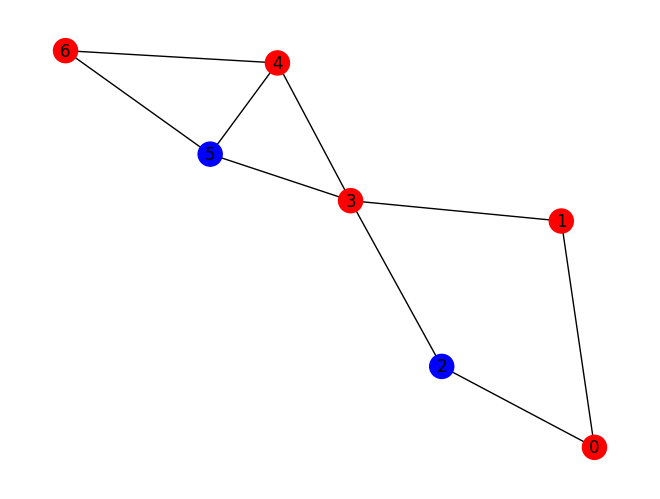

In [6]:
from queue import PriorityQueue
def dijkstra(graph, start_node, end_node):
    distance_dict = dict(graph.nodes)
    distance_dict = dict.fromkeys(dict(graph.nodes), float('inf'))
    distance_dict[start_node] = 0
    shortest_path = []
    visited = []

    pq = PriorityQueue()
    pq.put((0, start_node))

    while not pq.empty():
        (dist, current_node) = pq.get()
        visited.append(current_node)

        for neighbor in G.adj[current_node]:
                if graph[current_node][neighbor]['weight'] != -1:
                    distance = graph[current_node][neighbor]['weight']
                    if neighbor not in visited:
                        old_cost = distance_dict[neighbor]
                        new_cost = distance_dict[current_node] + distance
                        if new_cost < old_cost:
                            pq.put((new_cost, neighbor))
                            shortest_path.append((current_node, neighbor))
                            distance_dict[neighbor] = new_cost

        if current_node == end_node:
           break

    shortest_path2 = []
    current_val  = end_node
    for i in range(len(shortest_path) - 1, -1, -1):
        if shortest_path[i][1] == current_val:
            shortest_path2.append(shortest_path[i][1])
            current_val = shortest_path[i][0]
    shortest_path2.append(start_node)
 
    return shortest_path2, distance_dict[end_node]

path_to_point, distance_to_point = dijkstra(G, 0, 6)
print(path_to_point, distance_to_point)
colors = dict(G.nodes)
colors = dict.fromkeys(dict(G.nodes), 'blue')
for i in path_to_point:
    colors[i] = 'red'

nx.draw(G, with_labels = True, node_color = list(colors.values()))

3.	Zaproponuj modyfikację algorytmu z pliku Dijkstry1.py w taki sposób, aby obliczał i zwracał macierz odległości najkrótszych ścieżek od każdego wierzchołka do każdego. Rozmiary macierzy powinny być NxN, gdzie N to liczba wierzchołków grafu.

Wynik powinien być:

[0, 2, 6, 7, 17, 22, 19]

[2, 0, 8, 5, 15, 20, 17]

[6, 8, 0, 8, 18, 23, 20]

[7, 5, 8, 0, 10, 15, 12]

[17, 15, 18, 10, 0, 6, 2]

[22, 20, 23, 15, 6, 0, 6]

[19, 17, 20, 12, 2, 6, 0]

In [5]:
from queue import PriorityQueue
def dijkstra(graph):
    distance_matrix = [[]] * len(G.nodes)
    for i in G.nodes:
        distance_matrix[i] = [0] * len(G.nodes)
        distance_dict = dict(graph.nodes)
        distance_dict = dict.fromkeys(dict(graph.nodes), float('inf'))
        distance_dict[i] = 0
        visited = []

        pq = PriorityQueue()
        pq.put((0, i))

        while not pq.empty():
            (dist, current_node) = pq.get()
            visited.append(current_node)

            for neighbor in G.adj[current_node]:
                    if graph[current_node][neighbor]['weight'] != -1:
                        distance = graph[current_node][neighbor]['weight']
                        if neighbor not in visited:
                            old_cost = distance_dict[neighbor]
                            new_cost = distance_dict[current_node] + distance
                            if new_cost < old_cost:
                                pq.put((new_cost, neighbor))
                                distance_dict[neighbor] = new_cost
        for j in G.nodes:
            distance_matrix[i][j] = distance_dict[j]
    return distance_matrix
distance_matrix = dijkstra(G)
for i in distance_matrix:
    print(i)

[0, 2, 6, 7, 17, 22, 19]
[2, 0, 8, 5, 15, 20, 17]
[6, 8, 0, 8, 18, 23, 20]
[7, 5, 8, 0, 10, 15, 12]
[17, 15, 18, 10, 0, 6, 2]
[22, 20, 23, 15, 6, 0, 6]
[19, 17, 20, 12, 2, 6, 0]
